<a href="https://colab.research.google.com/github/k-avya/master/blob/master/WEB_SCRAPPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I have done web scraping of IPL player runs stats data of 2020 and perform a quick data exploration. 




In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

In [118]:
# The Building Blocks
year = '2020'
str = 'https://www.iplt20.com/stats/2020/most-runs'

# Combining the URL + year strings together
url = str.format(year)
url

'https://www.iplt20.com/stats/2020/most-runs'

In [119]:
years = [2016,2017,2018,2019,2020]
str = 'https://www.iplt20.com/stats/2020/most-runs'

for year in years:
  url = str.format(year)
  print(url)

https://www.iplt20.com/stats/2020/most-runs
https://www.iplt20.com/stats/2020/most-runs
https://www.iplt20.com/stats/2020/most-runs
https://www.iplt20.com/stats/2020/most-runs
https://www.iplt20.com/stats/2020/most-runs


**Read HTML webpage into pandas**

In [120]:
import pandas as pd

In [121]:
df = pd.read_html(url, header = 0)
df

[    POS              PLAYER  Mat  Inns  NO  Runs  ...   BF      SR  100  50  4s  6s
 0     1           KL  Rahul    3     3   1   222  ...  142  156.33    1   1  23   9
 1     2     Mayank  Agarwal    3     3   0   221  ...  130  170.00    1   1  21  11
 2     3     Faf  du Plessis    3     3   1   173  ...  116  149.13    0   2  11   7
 3     4       Sanju  Samson    2     2   0   159  ...   74  214.86    0   2   5  16
 4     5        Steve  Smith    2     2   0   119  ...   74  160.81    0   2  11   6
 ..  ...                 ...  ...   ...  ..   ...  ...  ...     ...  ...  ..  ..  ..
 75   76        Trent  Boult    2     1   0     0  ...    1    0.00    0   0   0   0
 76   77        Umesh  Yadav    2     1   0     0  ...    2    0.00    0   0   0   0
 77   78      Vijay  Shankar    1     1   0     0  ...    1    0.00    0   0   0   0
 78   79     Mitchell  Marsh    1     1   0     0  ...    1    0.00    0   0   0   0
 79   80  Bhuvneshwar  Kumar    2     1   0     0  ...    2    0.

How many tables are there in the webpage?

In [122]:
len(df)

1

In [123]:
df[0]

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,3,3,1,222,132*,111.00,142,156.33,1,1,23,9
1,2,Mayank Agarwal,3,3,0,221,106,73.66,130,170.00,1,1,21,11
2,3,Faf du Plessis,3,3,1,173,72,86.50,116,149.13,0,2,11,7
3,4,Sanju Samson,2,2,0,159,85,79.50,74,214.86,0,2,5,16
4,5,Steve Smith,2,2,0,119,69,59.50,74,160.81,0,2,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,Trent Boult,2,1,0,0,0*,0.00,1,0.00,0,0,0,0
76,77,Umesh Yadav,2,1,0,0,0*,0.00,2,0.00,0,0,0,0
77,78,Vijay Shankar,1,1,0,0,0*,0.00,1,0.00,0,0,0,0
78,79,Mitchell Marsh,1,1,0,0,0*,0.00,1,0.00,0,0,0,0


In [124]:
df2020 = df[0]

**Quick Exploratory Data Analysis**

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests


In [126]:
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Legend
output_notebook()

In [127]:
data = df2020.sort_values(["Runs"], axis=0, ascending=False)[:80]

In [128]:
data

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,3,3,1,222,132*,111.00,142,156.33,1,1,23,9
1,2,Mayank Agarwal,3,3,0,221,106,73.66,130,170.00,1,1,21,11
2,3,Faf du Plessis,3,3,1,173,72,86.50,116,149.13,0,2,11,7
3,4,Sanju Samson,2,2,0,159,85,79.50,74,214.86,0,2,5,16
4,5,Steve Smith,2,2,0,119,69,59.50,74,160.81,0,2,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,Trent Boult,2,1,0,0,0*,0.00,1,0.00,0,0,0,0
76,77,Umesh Yadav,2,1,0,0,0*,0.00,2,0.00,0,0,0,0
77,78,Vijay Shankar,1,1,0,0,0*,0.00,1,0.00,0,0,0,0
78,79,Mitchell Marsh,1,1,0,0,0*,0.00,1,0.00,0,0,0,0


In [129]:
p = figure(x_range=data.iloc[:,1], plot_width=800, plot_height=550, title="Highest Run Scorer", toolbar_location=None, tools="")

p.vbar(x=data.iloc[:,1], top=data.iloc[:,4], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2

In [130]:
show(p)

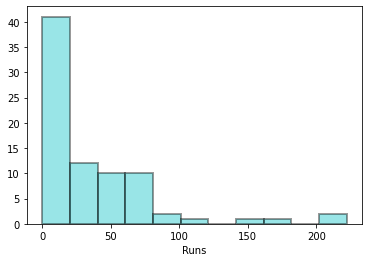

In [131]:
sns.distplot(df2020.Runs,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')

In [132]:
data = df2020[df2020['Runs'] > 40]

In [133]:
data = data.sort_values(['Runs'],axis=0, ascending=False)[:15]

In [134]:
data

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,3,3,1,222,132*,111.00,142,156.33,1,1,23,9
1,2,Mayank Agarwal,3,3,0,221,106,73.66,130,170.00,1,1,21,11
2,3,Faf du Plessis,3,3,1,173,72,86.50,116,149.13,0,2,11,7
3,4,Sanju Samson,2,2,0,159,85,79.50,74,214.86,0,2,5,16
4,5,Steve Smith,2,2,0,119,69,59.50,74,160.81,0,2,11,6
5,6,Rohit Sharma,2,2,0,92,80,46.00,64,143.75,0,1,5,6
6,7,Manish Pandey,2,2,0,85,51,42.50,71,119.71,0,1,6,3
7,8,AB de Villiers,2,2,0,79,51,39.50,48,164.58,0,1,8,3
8,9,Shubman Gill,2,2,1,77,70*,77.00,73,105.47,0,1,6,2
9,10,Ambati Rayudu,1,1,0,71,71,71.00,48,147.91,0,1,6,3


In [135]:
p = figure(x_range=data.iloc[:,1], plot_width=800, plot_height=600, title="Top Rated Books with more than 1000 Customers Rating", toolbar_location=None, tools="")

p.vbar(x=data.iloc[:,1], top=data.iloc[:,2], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2

In [136]:
show(p)

In [137]:
data = df2020.sort_values(["Runs"], axis=0, ascending=False)[:20]

In [138]:
data

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,3,3,1,222,132*,111.00,142,156.33,1,1,23,9
1,2,Mayank Agarwal,3,3,0,221,106,73.66,130,170.00,1,1,21,11
2,3,Faf du Plessis,3,3,1,173,72,86.50,116,149.13,0,2,11,7
3,4,Sanju Samson,2,2,0,159,85,79.50,74,214.86,0,2,5,16
4,5,Steve Smith,2,2,0,119,69,59.50,74,160.81,0,2,11,6
5,6,Rohit Sharma,2,2,0,92,80,46.00,64,143.75,0,1,5,6
6,7,Manish Pandey,2,2,0,85,51,42.50,71,119.71,0,1,6,3
7,8,AB de Villiers,2,2,0,79,51,39.50,48,164.58,0,1,8,3
8,9,Shubman Gill,2,2,1,77,70*,77.00,73,105.47,0,1,6,2
9,10,Ambati Rayudu,1,1,0,71,71,71.00,48,147.91,0,1,6,3
